# Simple Linear Regression. Minimal example

# Using the same code as before, please solve the following exercises
    6. Create a function f(x,z) = 13*xs + 7*zs - 12. Does the algorithm work in the same way?
    
    
Useful tip: When you change something, don't forget to RERUN all cells. This can be done easily by clicking:
Kernel -> Restart & Run All
If you don't do that, your algorithm will keep the OLD values of all parameters.

## Solution

Find the line of code, where we declare the targets, and change it from:

targets = 2*xs - 3*zs + 5 + noise

to 

targets = 13*xs + 7*zs - 12 + noise

Some takeaways:

1. The solution is almost found, judging by the values of the loss and those of the weights and biases.
2. I would say this algorithm is AS effective as that in the lecture. Still needs more iterations.
3. All else equal, the values of the loss are higher, as the values of the targets are higher.
4. The same algorithm and methodology solved a completely different problem. That's machine learning for you. 

See you in the next section!

### Import the relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Generate random input data to train on

In [2]:
n=100000
xs=np.random.uniform(-10,10,(n,1))
zs=np.random.uniform(-10,10,(n,1))

In [4]:
inputs=np.column_stack((xs,zs))
inputs.shape

(100000, 2)

### Generate the targets we will aim at

In [19]:
noise=np.random.uniform(-1,1,(n,1))

target=13*xs+7*zs-12+noise
print(target.shape)

(100000, 1)


### Initialize variables

In [20]:
inti_wt=0.1
weights=np.random.uniform(-inti_wt,inti_wt,(2,1))
bias=np.random.uniform(-inti_wt,inti_wt,1)

In [22]:
print(weights,bias)

[[-0.05906203]
 [ 0.05200636]] [0.04196613]


### Set a learning rate

In [25]:
learning_rate=0.02

### Train the model

In [26]:
for i in range(100):
    outputs=np.dot(inputs,weights)+bias
    deltas=outputs-target
     
    # We are considering the L2-norm loss, but divided by 2, so it is consistent with the lectures.
    # Moreover, we further divide it by the number of observations(n).
    # This is simple rescaling by a constant. We explained that this doesn't change the optimization logic,
    # as any function holding the basic property of being lower for better results, and higher for worse results
    # can be a loss function.
    loss=np.sum(deltas**2)/2/n
    
    print(loss)
    
    deltas_scaled=deltas/n
    
    # Applying Gradient Descent to update the weight and bias
    weights=weights-learning_rate*np.dot(inputs.T,deltas_scaled)
    bias=bias-learning_rate*np.sum(deltas_scaled)

3731.524546196357
470.45298484993236
110.96749810306787
69.26011735126492
62.43802409554051
59.52473363669764
57.12519551468155
54.86429723413264
52.69770579112932
50.61743378936361
48.61959735304707
46.70088106827215
44.85814621219688
43.08838332576389
41.388702668121944
39.75632899111674
38.18859695233531
36.68294675705152
35.23691997792513
33.848155540805564
32.51438586955967
31.233433183569904
30.00320594185154
28.821695427982323
27.686972470267904
26.597184291788178
25.550551485181067
24.545365107224207
23.579983888470434
22.652831553381255
21.762394246582417
20.907218061039032
20.085906664114738
19.297119017637883
18.53956718825328
17.812014244482807
17.1132722370626
16.442200259257987
15.797702583989732
15.178726874729593
14.584262467244216
14.013338719381183
13.46502342620367
12.938421297884965
12.432672497878377
11.94695123897511
11.480464434958009
11.032450405649373
10.602177633238895
10.188943567860392
9.792073480467716
9.410919361136333
9.044858860991987
8.693294276038843
8

### Print weights and biases and see if we have worked correctly.

In [27]:
print(weights,bias)

[[13.00019159]
 [ 6.99959333]] [-10.40392368]


### Plot last outputs vs targets
Since they are the last ones at the end of the training, they represent the final model accuracy. <br/>
The closer this plot is to a 45 degree line, the closer target and output values are.

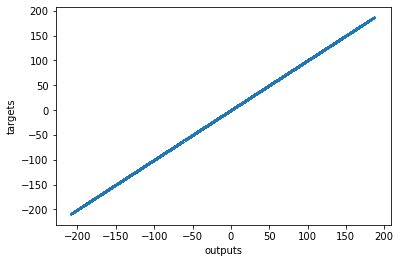

In [31]:
plt.plot(outputs,target)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()